# BIG MART SALES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

LOADING DATASETS

In [2]:
df_train=pd.read_csv('C:\\Users\\HP\\Documents\\internship\\Train.csv')

In [3]:
df_test=pd.read_csv('C:\\Users\\HP\\Documents\\internship\\Test.csv')

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_train.shape

(8523, 12)

In [6]:
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
df_test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

HANDLING NULL VALUES

In [11]:
df_train.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

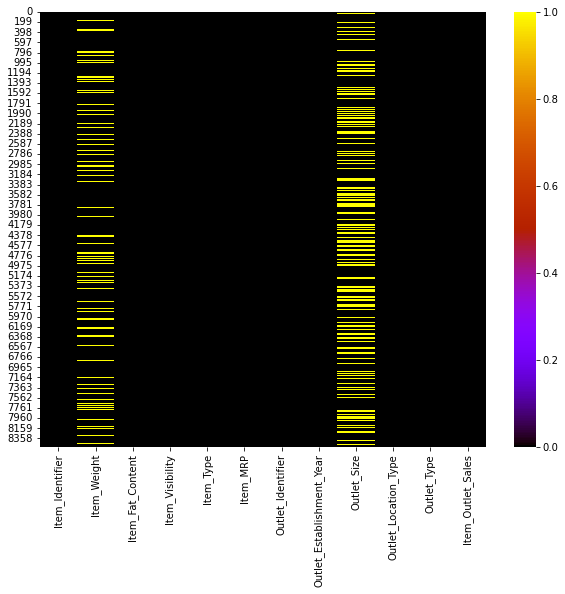

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isna(),cmap='gnuplot')

In [14]:
#There are null values in Item_Weight and Outlet_Size

In [15]:
corr=df_train.corr()['Item_Outlet_Sales']
corr

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [16]:
df_train.drop('Item_Weight',axis=1,inplace=True)
df_test.drop('Item_Weight',axis=1,inplace=True)

In [17]:
df_train

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
df_train['Outlet_Size']=df_train['Outlet_Size'].astype('category')
df_train['Outlet_Size'] =df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])
df_test['Outlet_Size']=df_test['Outlet_Size'].astype('category')
df_test['Outlet_Size'] =df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [19]:
df_train.isnull().any()

Item_Identifier              False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [20]:
df_train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
df_train.Item_Fat_Content = df_train.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'], value=['Low Fat', 'Low Fat', 'Regular'])

In [22]:
print(df_train.Item_Fat_Content.value_counts())
print('\n')
print(df_train.Item_Fat_Content.unique())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


['Low Fat' 'Regular']


In [23]:
df_train.Item_Identifier=df_train.Item_Identifier.astype('category')
df_train.Item_Fat_Content=df_train.Item_Fat_Content.astype('category')
df_train.Item_Type=df_train.Item_Type.astype('category')

df_train.Outlet_Identifier=df_train.Outlet_Identifier.astype('category')
df_train.Outlet_Establishment_Year=df_train.Outlet_Establishment_Year.astype('int64')
df_train.Outlet_Type=df_train.Outlet_Type.astype('category')
df_train.Outlet_Location_Type=df_train.Outlet_Location_Type.astype('category')
df_train.Outlet_Size=df_train.Outlet_Size.astype('category')

In [24]:
df_test.Item_Identifier=df_test.Item_Identifier.astype('category')
df_test.Item_Fat_Content=df_test.Item_Fat_Content.astype('category')
df_test.Item_Type=df_test.Item_Type.astype('category')

df_test.Outlet_Identifier=df_test.Outlet_Identifier.astype('category')
df_test.Outlet_Establishment_Year=df_test.Outlet_Establishment_Year.astype('int64')
df_test.Outlet_Type=df_test.Outlet_Type.astype('category')
df_test.Outlet_Location_Type=df_test.Outlet_Location_Type.astype('category')
df_test.Outlet_Size=df_test.Outlet_Size.astype('category')

EDA

Text(0.5, 1.0, 'Item_Fat_Content Count')

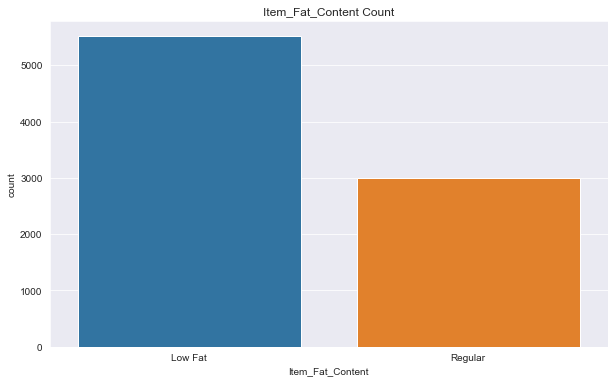

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(x='Item_Fat_Content',data=df_train)
plt.title('Item_Fat_Content Count')




<Figure size 720x432 with 0 Axes>

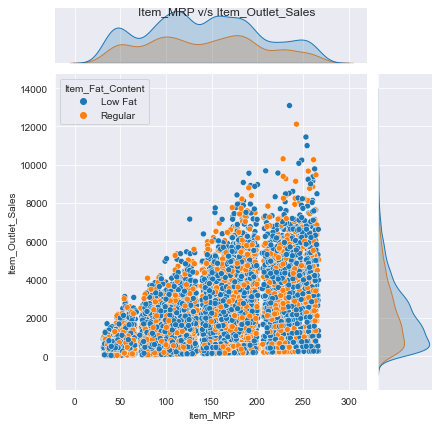

In [26]:
plt.figure(figsize=(10,6))

p=sns.jointplot(y='Item_Outlet_Sales',x='Item_MRP',data=df_train,hue='Item_Fat_Content')
p.fig.suptitle("Item_MRP v/s Item_Outlet_Sales")
plt.show()

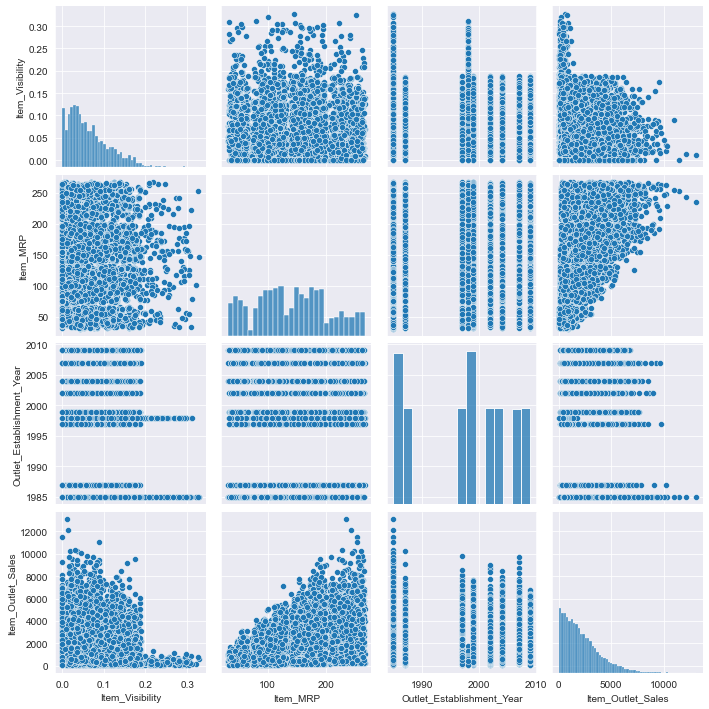

In [27]:
sns.pairplot(df_train)

In [28]:
order = df_train.groupby('Item_Type').count().sort_values(by='Item_Outlet_Sales', ascending=False).index
order

CategoricalIndex(['Fruits and Vegetables', 'Snack Foods', 'Household',
                  'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods',
                  'Health and Hygiene', 'Soft Drinks', 'Meat', 'Breads',
                  'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
                  'Seafood'],
                 categories=['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', ...], ordered=False, dtype='category', name='Item_Type')

<AxesSubplot:title={'center':'Item_Type count'}, xlabel='Item_Type', ylabel='count'>

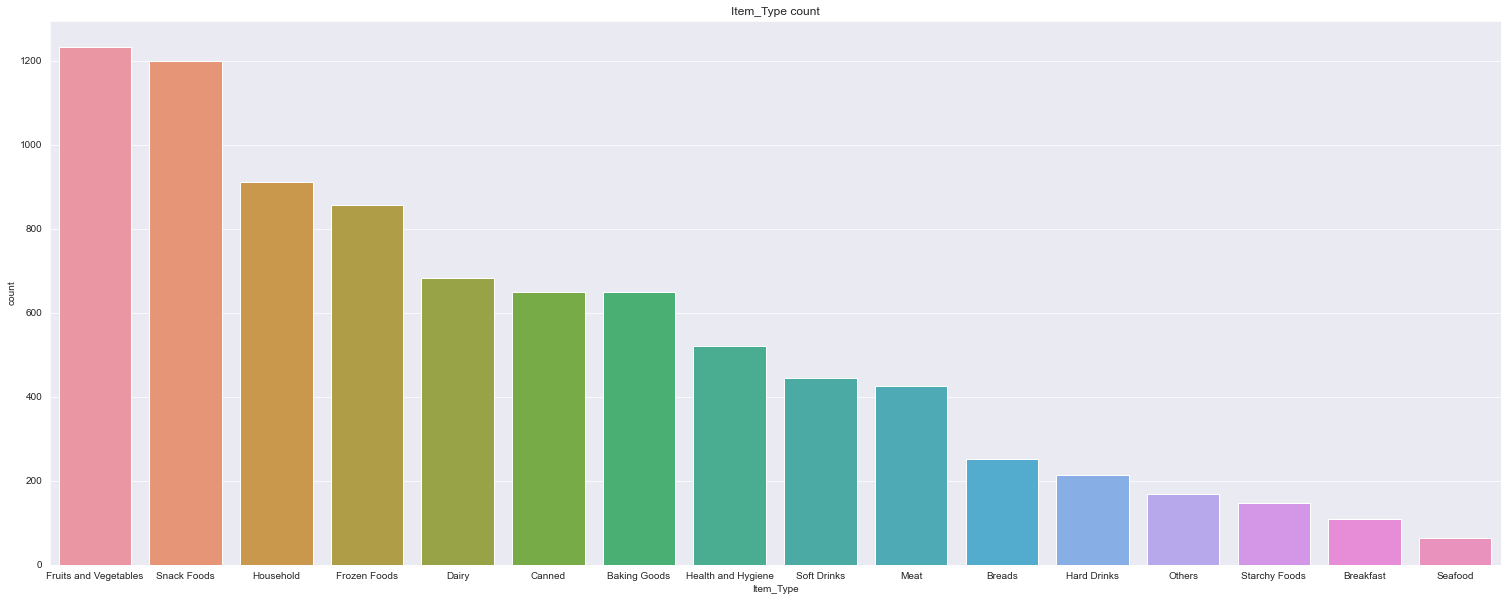

In [29]:
plt.figure(figsize=(26,10))
plt.title('Item_Type count',)
sns.countplot(x='Item_Type', data=df_train, order=order)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

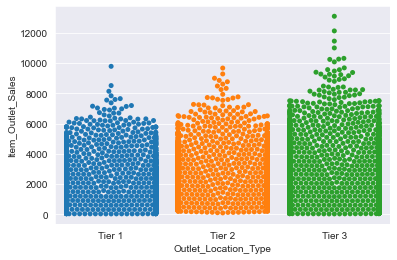

In [30]:
sns.swarmplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df_train)

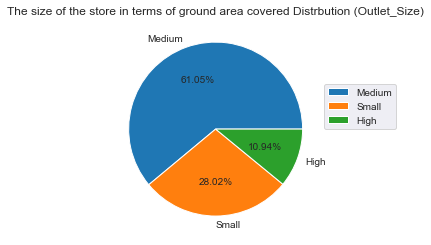

In [31]:
medium = df_train.Outlet_Size[df_train.Outlet_Size == 'Medium'].count()
small = df_train.Outlet_Size[df_train.Outlet_Size == 'Small'].count()
high = df_train.Outlet_Size[df_train.Outlet_Size == 'High'].count()
plt.title("The size of the store in terms of ground area covered Distrbution (Outlet_Size)")
plt.pie([medium, small, high], labels=['Medium', 'Small', 'High'], autopct="%.2f%%")
plt.legend(loc=(1,0.5))

plt.show()

<AxesSubplot:title={'center':'Whether the outlet is just a grocery store or some sort of supermarket count'}, xlabel='Outlet_Type', ylabel='count'>

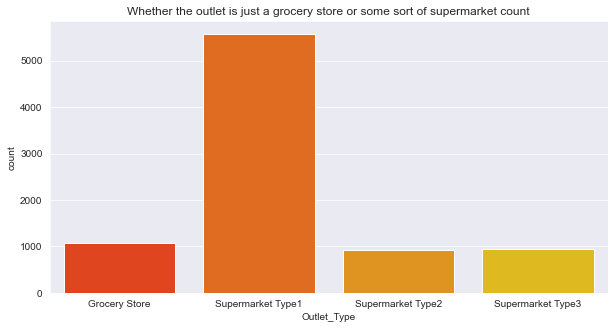

In [32]:
plt.figure(figsize=(10,5))
plt.title("Whether the outlet is just a grocery store or some sort of supermarket count")
sns.countplot(x='Outlet_Type', data=df_train, palette='autumn')

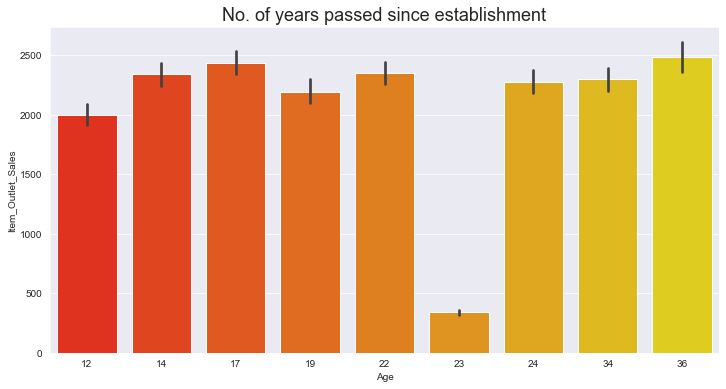

In [33]:
df_train['Age'] = 2021 - df_train.Outlet_Establishment_Year
df_test['Age'] = 2021 - df_test.Outlet_Establishment_Year
plt.figure(figsize=(12,6))
plt.title('No. of years passed since establishment',{'fontsize':18})
sns.barplot(x='Age', y='Item_Outlet_Sales',data=df_train, palette='autumn');

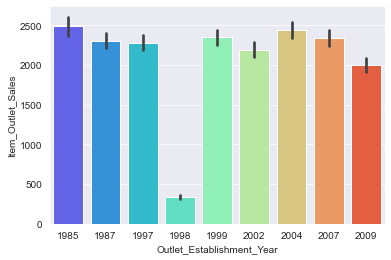

In [34]:
sns.barplot(y='Item_Outlet_Sales', x='Outlet_Establishment_Year',data=df_train,palette='rainbow');

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

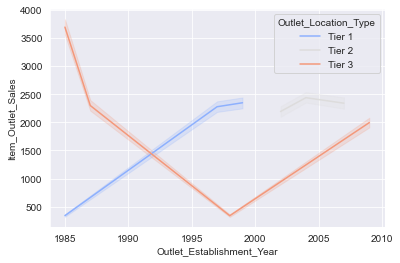

In [35]:
sns.lineplot(y='Item_Outlet_Sales', x='Outlet_Establishment_Year',data=df_train, palette='coolwarm',hue='Outlet_Location_Type')

KDE plot for continuous variables

<AxesSubplot:title={'center':'Item_Outlet_Sales'}, xlabel='Item_Outlet_Sales', ylabel='Density'>

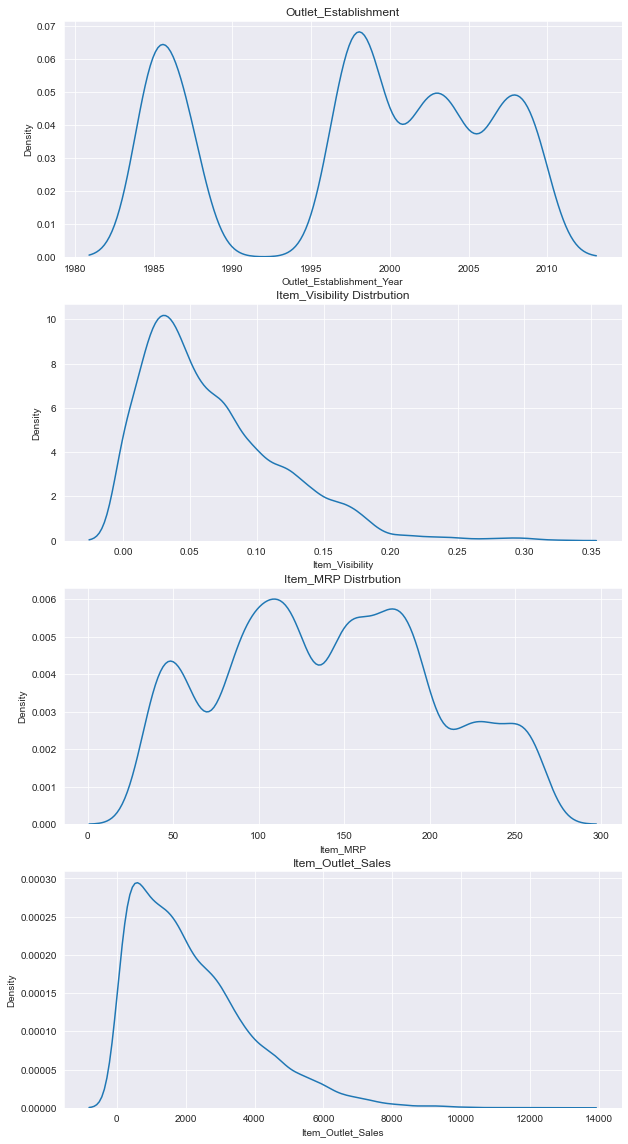

In [36]:
plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
plt.title("Outlet_Establishment")
sns.kdeplot(x='Outlet_Establishment_Year', data=df_train)


plt.subplot(4,1,2)
plt.title("Item_Visibility Distrbution")
sns.kdeplot(x='Item_Visibility', data=df_train)

plt.subplot(4,1,3)
plt.title("Item_MRP Distrbution")
sns.kdeplot(x='Item_MRP', data=df_train)

plt.subplot(4,1,4)
plt.title("Item_Outlet_Sales")
sns.kdeplot(x='Item_Outlet_Sales', data=df_train)

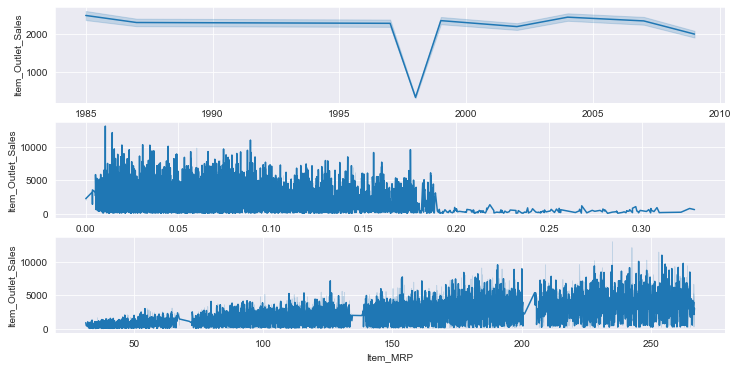

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df_train);

plt.subplot(3,1,2)
sns.lineplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df_train);

plt.subplot(3,1,3)
sns.lineplot(x='Item_MRP', y='Item_Outlet_Sales', data=df_train);

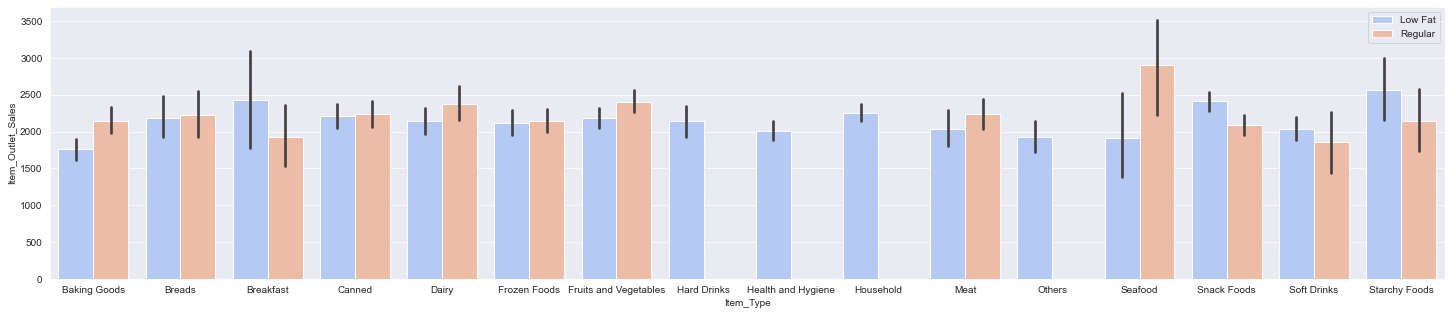

In [38]:
plt.figure(figsize=(25,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=df_train,palette='coolwarm')
plt.legend();

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


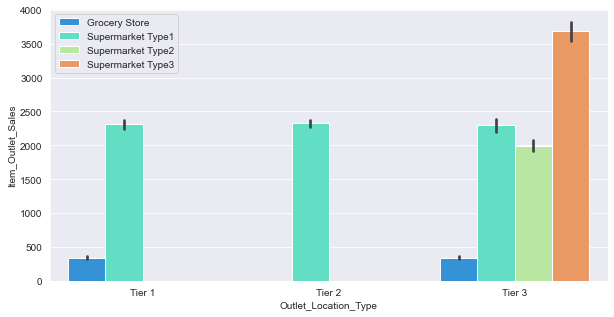

In [39]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df_train,palette='rainbow')
plt.legend()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


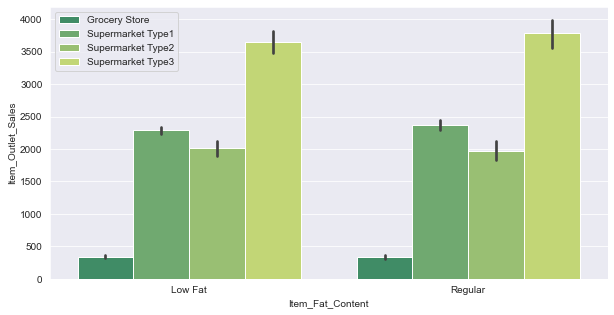

In [40]:
plt.figure(figsize=(10,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',hue='Outlet_Type',data=df_train,palette='summer')
plt.legend()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


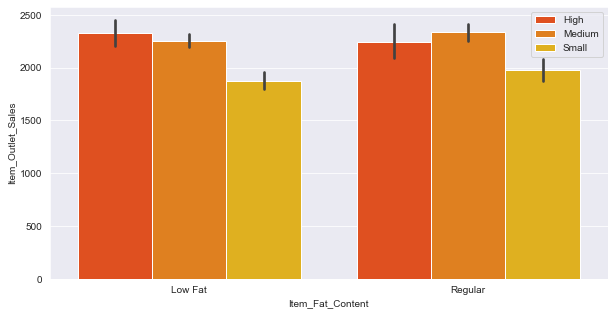

In [41]:
plt.figure(figsize=(10,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',hue='Outlet_Size',data=df_train,palette='autumn')
plt.legend()
plt.show()

In [42]:
df_test.isna().any()

Item_Identifier              False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Age                          False
dtype: bool

In [43]:
#Label Encoder
from sklearn import preprocessing

encode = preprocessing.LabelEncoder()
list_transform = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']

for i in list_transform:
    df_train[i] = encode.fit_transform(df_train[i])
    
for i in list_transform:
    df_test[i] = encode.fit_transform(df_test[i])

In [44]:
df_train.dtypes

Item_Identifier              category
Item_Fat_Content                int32
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                     int32
Outlet_Location_Type            int32
Outlet_Type                     int32
Item_Outlet_Sales             float64
Age                             int64
dtype: object

In [45]:
df_test.dtypes

Item_Identifier              category
Item_Fat_Content                int32
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                     int32
Outlet_Location_Type            int32
Outlet_Type                     int32
Age                             int64
dtype: object

In [46]:
df_train = df_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
df_test= df_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [47]:
#One Hot Encoder to convert non-order categorical variable Item_Tyoe:
dummies1 = pd.get_dummies(df_train['Item_Type'])
dummies2 = pd.get_dummies(df_test['Item_Type'])

In [48]:
df_train.columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Age'],
      dtype='object')

In [49]:
df_train.head(2)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,22
1,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,12


In [50]:
df_test.head(2)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,1,0.007565,Snack Foods,107.8622,1,0,1,22
1,4,0.038428,Dairy,87.3198,1,1,1,14


In [51]:
df_train = pd.concat([df_train, dummies1], axis=1)
df_test = pd.concat([df_test, dummies2], axis=1)

In [52]:
df_train.drop('Item_Type', axis=1, inplace=True)
df_test.drop('Item_Type', axis=1, inplace=True)

In [54]:
df_train.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Baking Goods,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0.016047,249.8092,1,0,1,3735.1380,22,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.019278,48.2692,1,2,2,443.4228,12,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.016760,141.6180,1,0,1,2097.2700,22,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0.000000,182.0950,1,2,0,732.3800,23,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0.000000,53.8614,0,2,1,994.7052,34,0,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
df_train.shape

(8523, 24)

In [56]:
df_train.columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Age',
       'Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object')

In [58]:
X=df_train[['Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Age',
       'Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods']]
y=df_train['Item_Outlet_Sales']

In [59]:
X.shape

(8523, 23)

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr=LinearRegression()

In [65]:
lr.fit(X_train,y_train)

LinearRegression()

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [67]:
predict_lr=lr.predict(X_test)

In [69]:
mse=mean_squared_error(y_test,predict_lr)
mse

1296859.5864527074

In [70]:
lr_score=np.sqrt(mse)
lr_score

1138.7974299464797

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_lr))
print('MSE:', metrics.mean_squared_error(y_test, predict_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predict_lr)))

MAE: 862.2807963347517
MSE: 1296859.5864527074
RMSE: 1138.7974299464797


Cross Val for LinearRegression

In [76]:
from sklearn.model_selection import cross_val_score

In [90]:
score=cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=15)

In [91]:
lr_score_cross=np.sqrt(-score)
lr_score_cross

array([1202.9739454 , 1150.0081296 , 1292.07680972, 1233.25747281,
       1275.57878574, 1230.2816572 , 1284.12219106, 1248.38652314,
       1111.14627416, 1322.18809418, 1206.09596621, 1143.56412562,
       1321.96918319, 1237.35670515, 1105.40249216])

In [92]:
np.mean(lr_score_cross),np.std(lr_score_cross)

(1224.2938903549248, 68.58281646543006)

SVR

In [93]:
from sklearn.svm import SVR

In [94]:
svm=SVR(epsilon=10,kernel='linear')

In [103]:
svm.fit(X_train,y_train)

SVR(epsilon=10, kernel='linear')

In [104]:
predict_svm=svm.predict(X_test)

In [105]:
mse=mean_squared_error(y_test,predict_svm)
mse

1403819.364493656

In [106]:
svm_score=np.sqrt(mse)
svm_score

1184.8288334158888

Cross VAL SVR

In [109]:
score=cross_val_score(svm,X_train,y_train,cv=10,scoring='neg_mean_squared_error')

In [111]:
svm_score_cross=np.sqrt(-score)
svm_score_cross

array([1213.30222189, 1316.62071627, 1329.51298112, 1279.40547984,
       1331.12533872, 1236.94196884, 1329.73846572, 1185.19577518,
       1351.94302465, 1225.26409815])

In [112]:
np.mean(svm_score_cross),np.std(svm_score_cross)

(1279.9050070382928, 56.87076318379322)

DECISSION TREE

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
dtr=DecisionTreeRegressor()

In [117]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [118]:
predict_dtr=dtr.predict(X_test)

In [119]:
from sklearn.metrics import mean_squared_error

In [121]:
mse=mean_squared_error(y_test,predict_dtr)
mse

2204658.2986652846

In [123]:
dtr_score=np.sqrt(mse)
dtr_score

1484.8091792096668

CROSS VAL DECSION TREE

In [124]:
dtr=DecisionTreeRegressor()
score=cross_val_score(dtr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
dtr_score_cross=np.sqrt(-score)
np.mean(dtr_score_cross),np.std(dtr_score_cross)

(1560.6744151520772, 58.448490192270604)

RANDOM FOREST

In [125]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
predict_r=rf.predict(X_test)
mse=mean_squared_error(y_test,predict_r)
rf_score=np.sqrt(mse)
rf_score

1089.2185210368787

CROSS VAL RANDOM FOREST

In [126]:
rf=RandomForestRegressor()
score=cross_val_score(rf,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
np.mean(rf_score_cross),np.std(rf_score_cross)

(1162.1245982590947, 44.04167967008274)

GRADIENT BOOSTING

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
pred=gbr.predict(X_test)
gb_score=mean_squared_error(y_test,pred)
gb_score=np.sqrt(gb_score)
gb_score

1027.3903064769754

CROSS VAL FOR GRADIENT BOOSTING

In [128]:
gbr=GradientBoostingRegressor()
score=cross_val_score(gbr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
gb_score_cross=np.sqrt(-score)
np.mean(gb_score_cross),np.std(gb_score_cross)

(1113.361878198089, 40.781019377416854)

In [129]:
#Gradient Boosting shows the minimum mean squared error
#Thus it gives the best model